<a href="https://colab.research.google.com/github/anaesthetehere/BA_Reviews/blob/main/British_Airways_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I will never travel with Br...
1,✅ Trip Verified | I am already in Portugal so...
2,✅ Trip Verified | Terrible. Avoid this airlin...
3,✅ Trip Verified | Despite being a gold member...
4,Not Verified | Regarding the aircraft and seat...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df

,reviews
0,✅ Trip Verified | I will never travel with Br...
1,✅ Trip Verified | I am already in Portugal so...
2,✅ Trip Verified | Terrible. Avoid this airlin...
3,✅ Trip Verified | Despite being a gold member...
4,Not Verified | Regarding the aircraft and seat...
...,...
1995,✅ Verified Review | Flew London Heathrow to W...
1996,✅ Verified Review | I fly this route 3-4 time...
1997,Flew Zurich to London Heathrow. Very friendly ...
1998,✅ Verified Review | Flew British Airways from...


Only keeping the reviews.

In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
df

,reviews
0,I will never travel with British Airways aga...
1,I am already in Portugal so contacted them t...
2,Terrible. Avoid this airline. It’s now becom...
3,"Despite being a gold member, the British Air..."
4,Regarding the aircraft and seat: The business...
...,...
1995,Flew London Heathrow to Washington DC. The B...
1996,"I fly this route 3-4 times a year, unfortuna..."
1997,None
1998,Flew British Airways from Boston to Berlin v...


Cleaning the Texts

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,I will never travel with British Airways aga...,I will never travel with British Airways agai...
1,I am already in Portugal so contacted them t...,I am already in Portugal so contacted them to...
2,Terrible. Avoid this airline. It’s now becom...,Terrible Avoid this airline It s now becoming...
3,"Despite being a gold member, the British Air...",Despite being a gold member the British Airwa...
4,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged,Sentiment,Analysis
0,I will never travel with British Airways aga...,I will never travel with British Airways agai...,"[(never, r), (travel, v), (British, a), (Airwa...",-0.9845,Negative
1,I am already in Portugal so contacted them t...,I am already in Portugal so contacted them to...,"[(already, r), (Portugal, n), (contacted, v), ...",-0.5719,Negative
2,Terrible. Avoid this airline. It’s now becom...,Terrible Avoid this airline It s now becoming...,"[(Terrible, a), (Avoid, n), (airline, n), (bec...",-0.8519,Negative
3,"Despite being a gold member, the British Air...",Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri...",-0.2382,Negative
4,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",-0.3610,Negative


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Sentiment,Analysis,Lemma
0,I will never travel with British Airways aga...,I will never travel with British Airways agai...,"[(never, r), (travel, v), (British, a), (Airwa...",-0.9845,Negative,never travel British Airways spend business ...
1,I am already in Portugal so contacted them t...,I am already in Portugal so contacted them to...,"[(already, r), (Portugal, n), (contacted, v), ...",-0.5719,Negative,already Portugal contact today cancel return...
2,Terrible. Avoid this airline. It’s now becom...,Terrible Avoid this airline It s now becoming...,"[(Terrible, a), (Avoid, n), (airline, n), (bec...",-0.8519,Negative,Terrible Avoid airline become regular practi...
3,"Despite being a gold member, the British Air...",Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri...",-0.2382,Negative,Despite gold member British Airways staff He...
4,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",-0.3610,Negative,Regarding aircraft seat business class seat ...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,I will never travel with British Airways aga...,never travel British Airways spend business ...
1,I am already in Portugal so contacted them t...,already Portugal contact today cancel return...
2,Terrible. Avoid this airline. It’s now becom...,Terrible Avoid airline become regular practi...
3,"Despite being a gold member, the British Air...",Despite gold member British Airways staff He...
4,Regarding the aircraft and seat: The business...,Regarding aircraft seat business class seat ...
...,...,...
1995,Flew London Heathrow to Washington DC. The B...,Flew London Heathrow Washington DC Business ...
1996,"I fly this route 3-4 times a year, unfortuna...",fly route time year unfortunately competitio...
1997,None,None
1998,Flew British Airways from Boston to Berlin v...,Flew British Airways Boston Berlin via Londo...


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Sentiment,Analysis,Lemma
0,I will never travel with British Airways aga...,I will never travel with British Airways agai...,"[(never, r), (travel, v), (British, a), (Airwa...",-0.9643,Negative,never travel British Airways spend business ...
1,I am already in Portugal so contacted them t...,I am already in Portugal so contacted them to...,"[(already, r), (Portugal, n), (contacted, v), ...",-0.2263,Negative,already Portugal contact today cancel return...
2,Terrible. Avoid this airline. It’s now becom...,Terrible Avoid this airline It s now becoming...,"[(Terrible, a), (Avoid, n), (airline, n), (bec...",-0.7430,Negative,Terrible Avoid airline become regular practi...
3,"Despite being a gold member, the British Air...",Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri...",0.7951,Positive,Despite gold member British Airways staff He...
4,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",0.8676,Positive,Regarding aircraft seat business class seat ...


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    999
Negative    694
Neutral     307
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f826d6fab90>,
 [Text(0.0017278530032240136, 1.0999986429646171, 'Positive'),
  Text(-0.511666137747723, -0.9737544677598806, 'Negative'),
  Text(1.1960472309084247, -0.6260758911156777, 'Neutral')],
 [Text(0.0009424652744858255, 0.599999259798882, '50.0%'),
  Text(-0.27909062058966705, -0.5311388005962985, '34.7%'),
  Text(0.7530667750164155, -0.3941959314432045, '15.4%')])

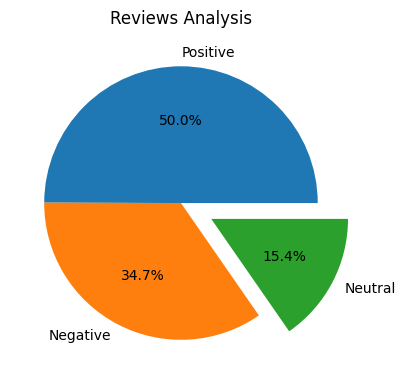

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
   